In [10]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
calhouse=fetch_california_housing()

In [4]:
calhouse.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
df=pd.DataFrame(data=calhouse.data,columns=calhouse.feature_names)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df['target']=calhouse.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=.33)

In [15]:
from timeit import default_timer as timer
start_ho = timer()
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
end_ho = timer()

time_ho = end_ho - start_ho

In [16]:
time_ho

1.3830793000000767

In [17]:
start_ho

813.294959

In [18]:
end_ho

814.6780383

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

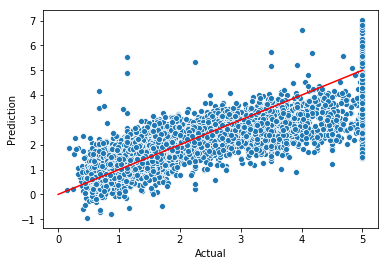

In [24]:
plot=sns.scatterplot(y_test,pred)
plot.set(xlabel="Actual",ylabel="Prediction")

x_plot = np.linspace(0,5,100)
y_plot=x_plot
plt.plot(x_plot,y_plot,color='r')

In [25]:
# model score (neg_mean_squared_error)
start_ho_score=timer()
ho_score=-1*mean_squared_error(y_test,pred)
print(ho_score)
end_ho_score=timer()
ho_score_time = (end_ho_score - start_ho_score)

-0.5314065057201572


In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
start_k = timer()
lrk=LinearRegression()
kpred=cross_val_predict(lrk,x,y,cv=10)
print(kpred)
end_k = timer()
kfold_time = end_k - start_k

[4.22358985 4.04800271 3.75534521 ... 0.14474758 0.29600522 0.49525933]


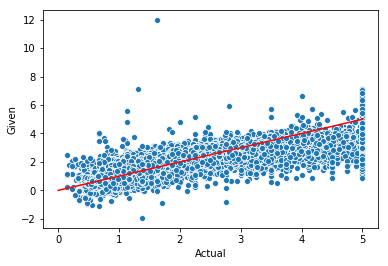

In [29]:
plot_k = sns.scatterplot(y,kpred)
plot_k.set(xlabel="Actual",ylabel="Given")

x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot,y_plot,color='r')

In [30]:
kfscore_start = timer()
kfscore=cross_val_score(lrk,x,y,cv=10,scoring='neg_mean_squared_error')
print(kfscore.mean())
kfscore_end = timer()
kfscore_time = kfscore_end - kfscore_start

-0.550952429695659


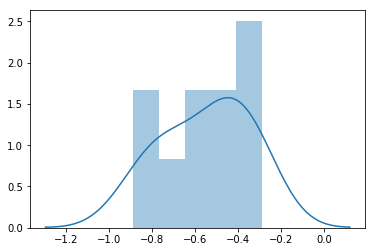

In [33]:
sns.distplot(kfscore,bins=5)

In [36]:
start_loo = timer()
loopred = cross_val_predict(lrk,x,y,cv=(len(x)))
end_loo = timer()
time_loo = end_loo - start_loo
time_loo

221.91250630000013

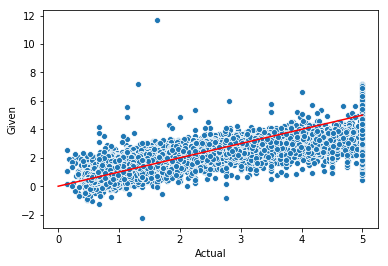

In [35]:
plot_loo = sns.scatterplot(y,loopred)
plot_loo.set(xlabel="Actual",ylabel="Given")

x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot,y_plot,color="r")

In [39]:
looscorestart = timer()
looscore = cross_val_score(lrk,x,y,cv=(len(x)),scoring="neg_mean_squared_error")
print(looscore.mean())
looscoreend = timer()
looscoretime = looscoreend - looscorestart

-0.5282462043712458


In [41]:
print("Hold out method took", time_ho, "seconds to generate a model and", ho_score_time ,"seconds to generate a MSE of", ho_score)
print("K-Fold method took", kfold_time, 'seconds to generate a model and', kfscore_time, 'seconds to generate a MSE of', kfscore.mean())
print("Leave One Out Cross Validation method took", time_loo, 'seconds to generate a model and', looscoretime, 'seconds to generate a MSE of', looscore)

Hold out method took 1.3830793000000767 seconds to generate a model and 0.0019035999998777697 seconds to generate a MSE of -0.5314065057201572
K-Fold method took 0.1427440000002207 seconds to generate a model and 0.1223824999997305 seconds to generate a MSE of -0.550952429695659
Leave One Out Cross Validation method took 221.91250630000013 seconds to generate a model and 224.60690869999962 seconds to generate a MSE of [-0.15566565 -0.15351022 -0.02423077 ... -0.56566365 -0.27892503
 -0.1431617 ]
